# Characterising CaL channel and HH channel

In [104]:
from neuron import h
from neuron.units import ms, mV
import matplotlib.pyplot as plt

In [105]:
# define a function to plot the current vs time
def plot_currents(i,t, title):
    plt.figure(figsize=(20, 10))
    plt.plot(t,i)
    plt.xlabel("t (ms)")
    plt.ylabel("i (mA/cm^2)")
    plt.title(title)
    plt.show()

In [106]:
# define a function to plot the current vs time
def plot_voltage(v,t, title):
    plt.figure(figsize=(20, 10))
    plt.plot(t,v)
    plt.xlabel("t (ms)")
    plt.ylabel("v (mV)")
    plt.title(title)
    plt.show()

In [107]:
def plot_all_currents(ik,ina,ica,t):
    plt.figure(figsize=(20, 10))
    plt.plot(t, ik, label="I_K")
    plt.plot(t,ica, label="I_CaL")
    plt.plot(t,ina, label="I_Na")
    plt.xlabel("t (ms)")
    plt.ylabel("i (mA/cm^2)")
    plt.legend()
    plt.show()

In [108]:
soma = h.Section(name="soma")
soma.L = 18.8
soma.diam =18.8
soma.Ra =123

In [109]:
soma.insert("hh")
soma.insert("cal")

soma

In [110]:
mech = soma(0.5).hh
print(dir(mech))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'il', 'is_ion', 'm', 'n', 'name', 'segment']


In [111]:
print(mech.gkbar)
print(soma(0.5).hh.gkbar)

0.036
0.036


In [112]:
soma.ek = -89.1
soma.ena = 71.5
# soma.psection()

## Current Clamp

Text(0, 0.5, 'ical (mA/cm^2)')

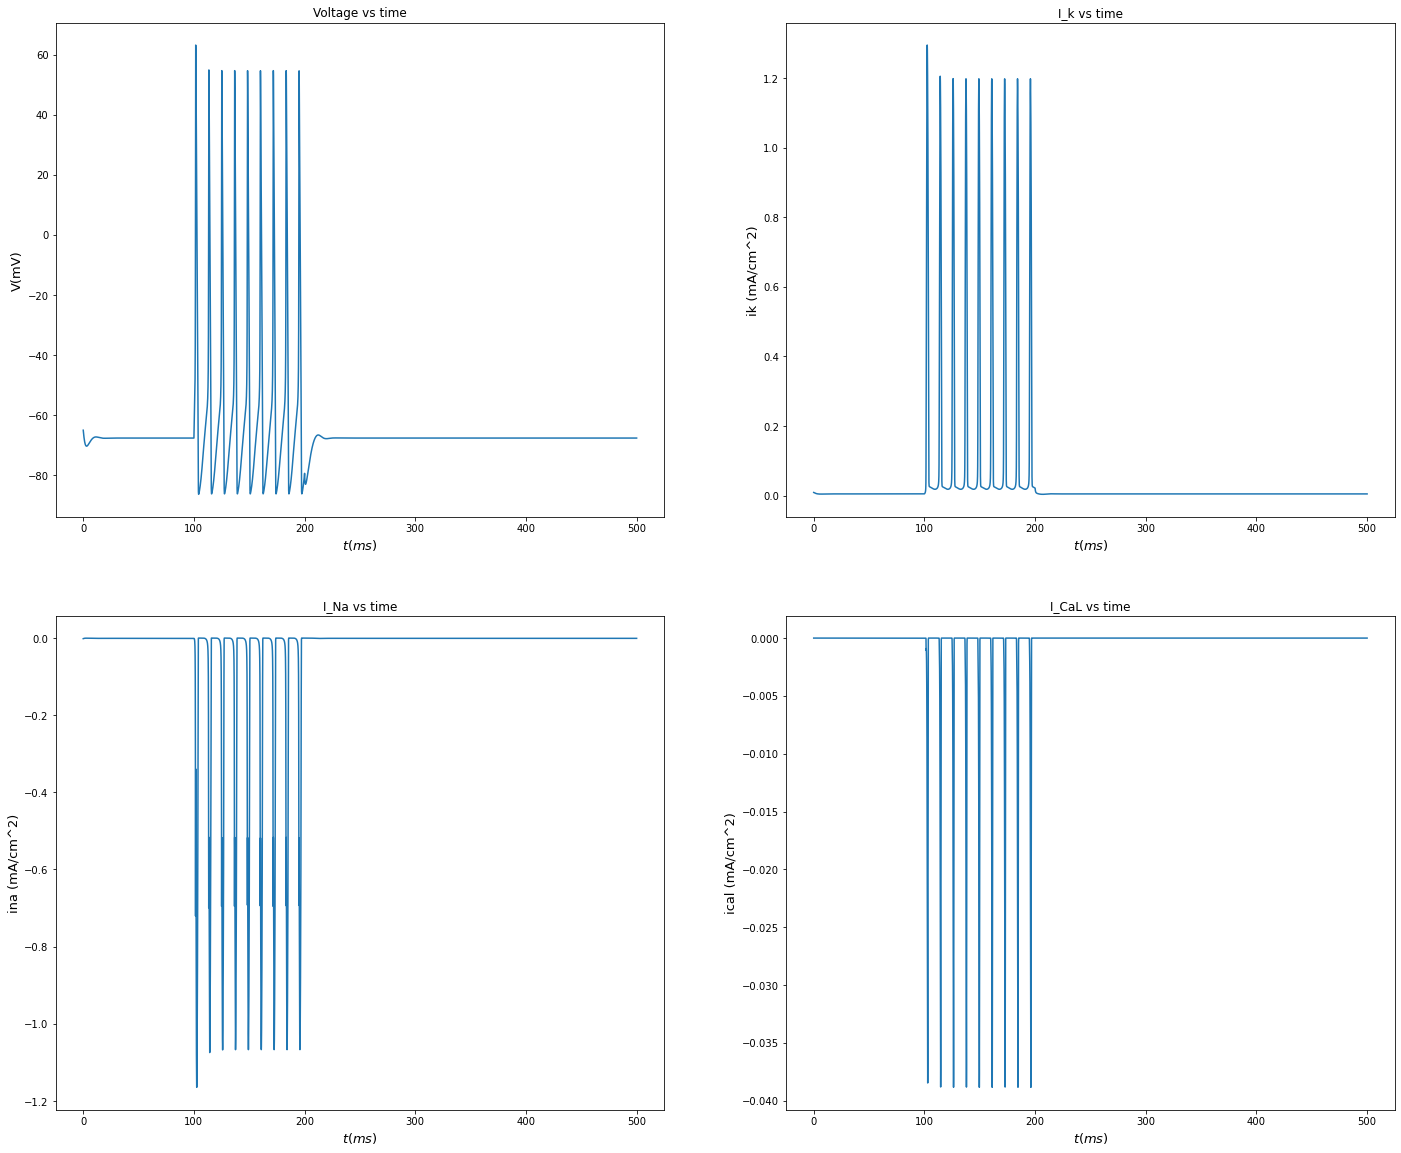

In [113]:
f,ax = plt.subplots(2,2,figsize=(24,20))

iclamp = h.IClamp(soma(0.5))
iclamp.delay = 100
iclamp.dur =100
iclamp.amp = 0.2
v = h.Vector().record(soma(0.5)._ref_v)  # Membrane potential vector
t = h.Vector().record(h._ref_t)  # Time stamp vector
ik = h.Vector().record(soma(0.5)._ref_ik)  # I_K Current vector
ina = h.Vector().record(soma(0.5)._ref_ina)  # I_Na Current vector
ica = h.Vector().record(soma(0.5)._ref_ica)  # I_CaL Current vector
h.load_file("stdrun.hoc")
h.finitialize(-65 * mV)
h.continuerun(500 * ms)

#ploting time vs current and voltage
ax[0,0].plot(t,v)
ax[0,0].set_title('Voltage vs time')
ax[0,0].set_xlabel('$t(ms)$',fontsize=13)
ax[0,0].set_ylabel('V(mV)',fontsize=13)

ax[0,1].plot(t,ik)
ax[0,1].set_title('I_k vs time')
ax[0,1].set_xlabel('$t(ms)$',fontsize=13)
ax[0,1].set_ylabel('ik (mA/cm^2)',fontsize=13)

ax[1,0].plot(t,ina)
ax[1,0].set_title('I_Na vs time')
ax[1,0].set_xlabel('$t(ms)$',fontsize=13)
ax[1,0].set_ylabel('ina (mA/cm^2)',fontsize=13)

ax[1,1].plot(t,ica)
ax[1,1].set_title('I_CaL vs time')
ax[1,1].set_xlabel('$t(ms)$',fontsize=13)
ax[1,1].set_ylabel('ical (mA/cm^2)',fontsize=13)

### Insights
1. Here we can see the bursting started as soon as we clamped the current around 100ms and it goes till 200ms.
2. We clamped the current for 100 ms and the bursting goes on from 100ms to 200ms but there is no bursting after that.
3. If there is no injected current voltage doesn't reach the threshold value and no action potential is observed

## Voltage Clamp

In [114]:
#remove current clamp
iclamp.amp = 0

Text(0, 0.5, 'ical (mA/cm^2)')

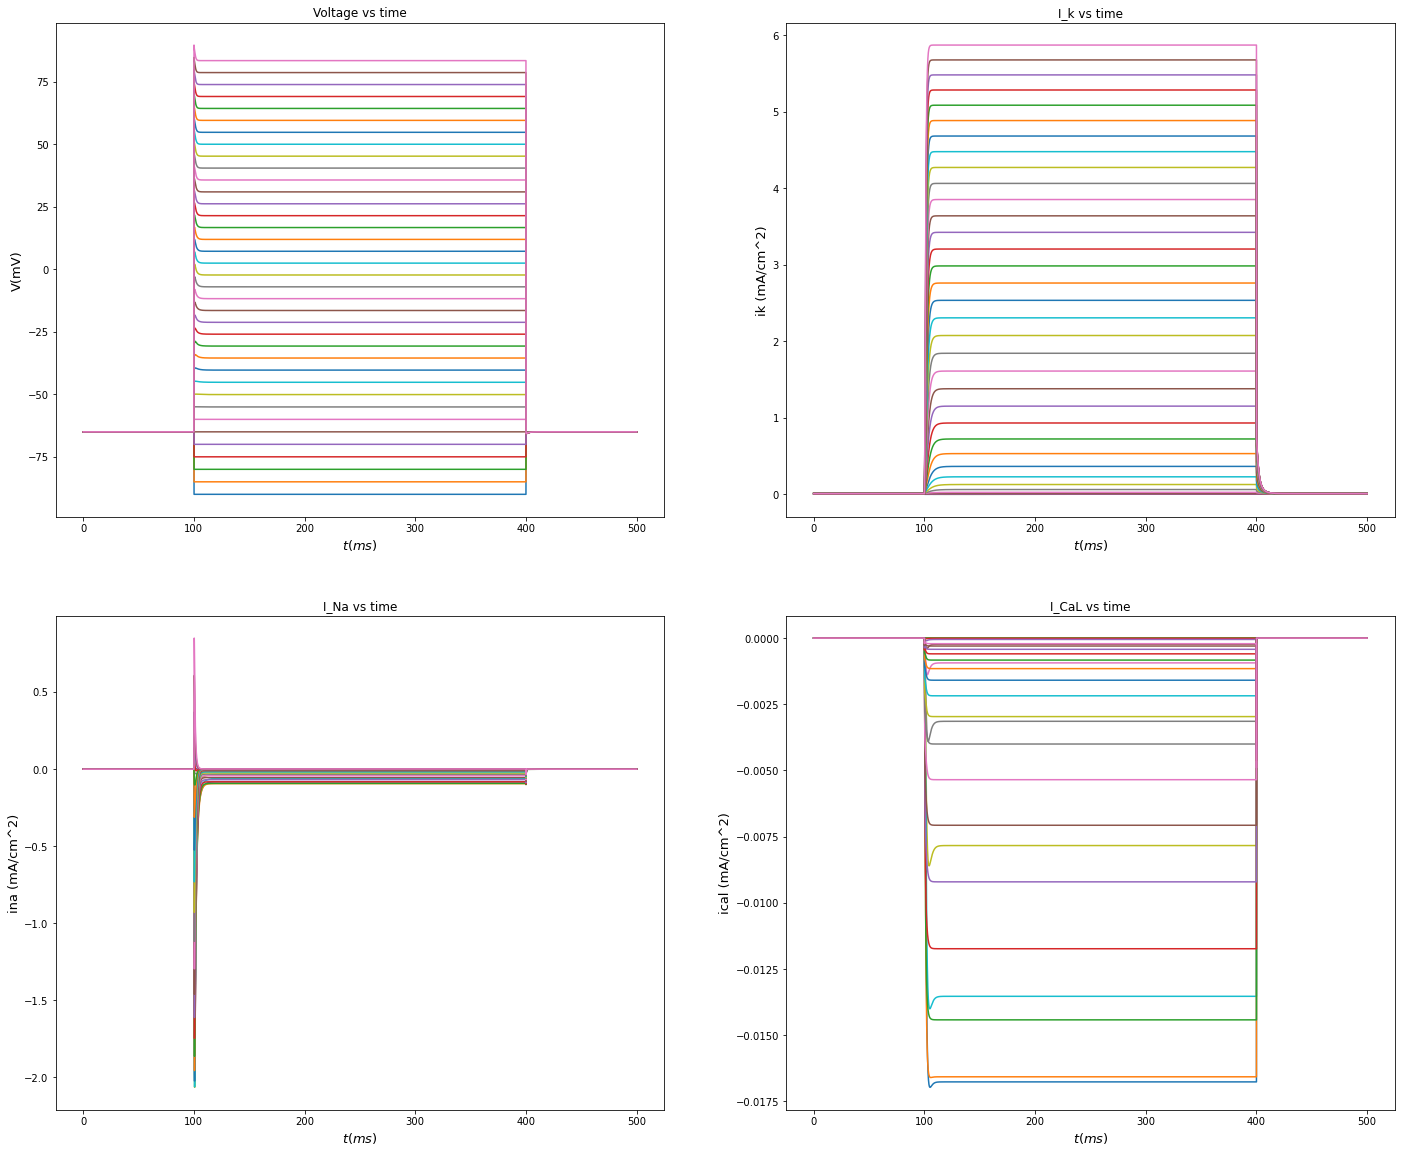

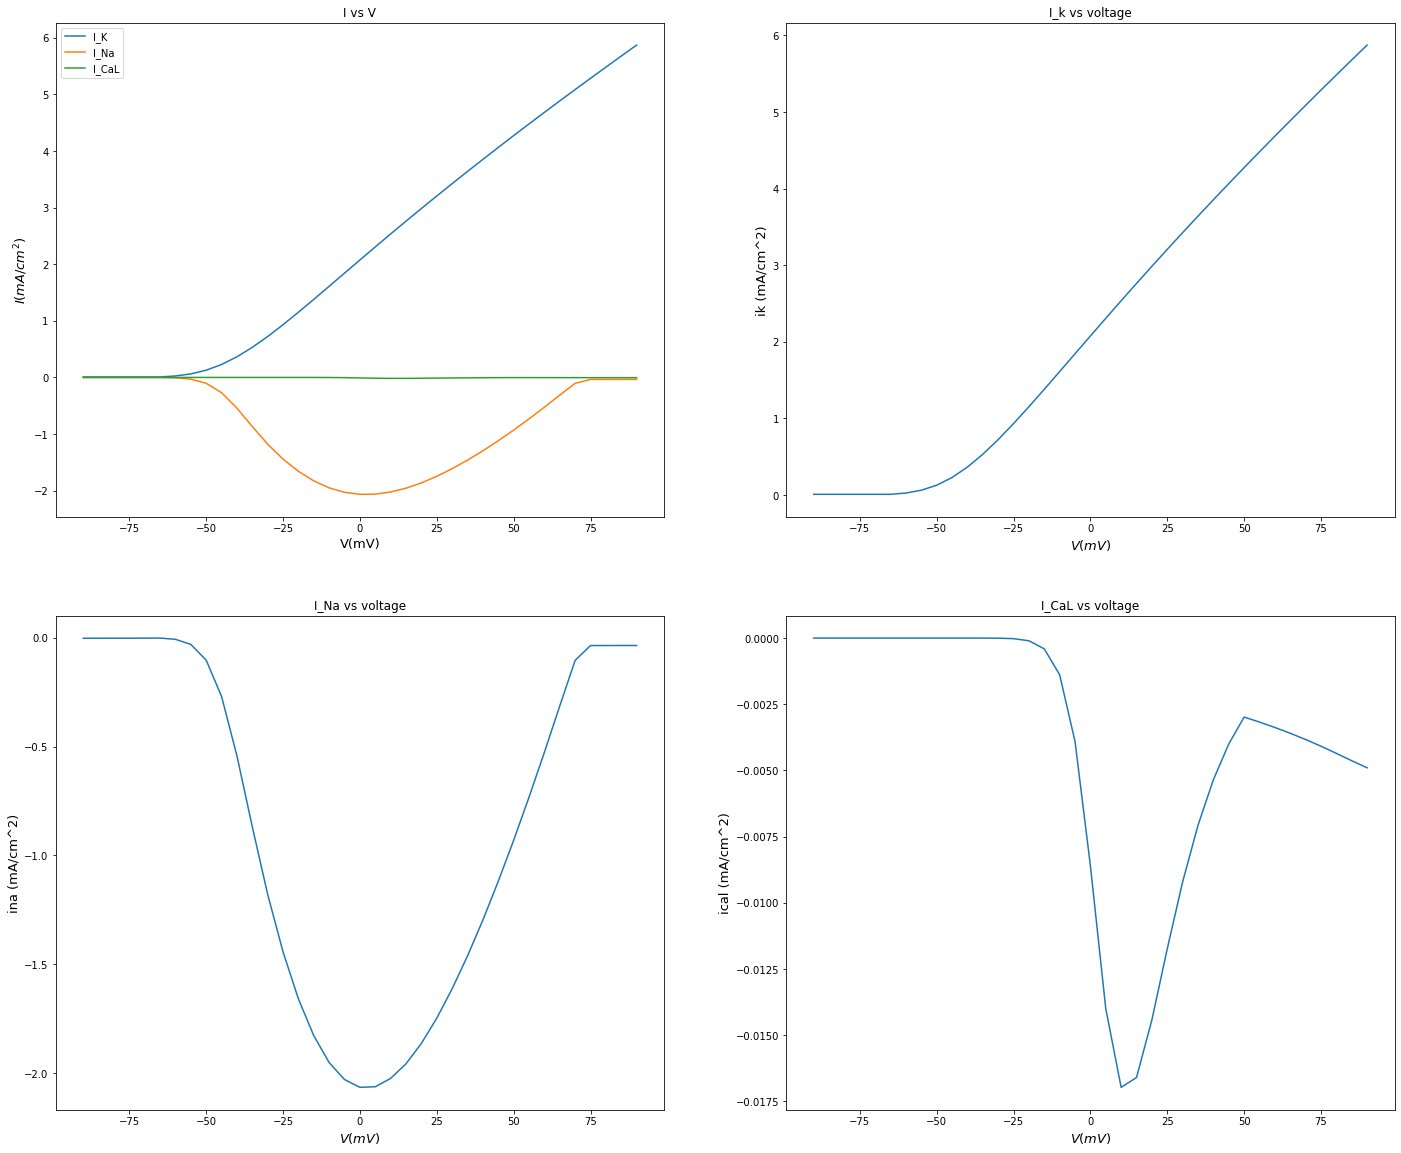

In [115]:
vvec= []
ikvec = []
inavec = []
icalvec = []

f,ax = plt.subplots(2,2,figsize=(24,20))
# apply voltage clamp
for i in range(0,37):
    vclamp = h.SEClamp(soma(0.5))
    vclamp.dur1 = 100
    vclamp.dur2 = 300
    vclamp.dur3 = 100
    vclamp.rs = 0.1
    vclamp.amp1 = -65
    vclamp.amp2 = -90+5*i
    vclamp.amp3 = -65

    v = h.Vector().record(soma(0.5)._ref_v)  # Membrane potential vector
    t = h.Vector().record(h._ref_t)  # Time stamp vector
    ik = h.Vector().record(soma(0.5)._ref_ik)  # I_K Current vector
    ina = h.Vector().record(soma(0.5)._ref_ina)  # I_Na Current vector
    ica = h.Vector().record(soma(0.5)._ref_ica)  # I_CaL Current vector
    h.load_file("stdrun.hoc")
    h.finitialize(-65 * mV)
    h.continuerun(500 * ms)
    vvec.append(vclamp.amp2)
    ikvec.append(max(ik))
    inavec.append(min(ina))
    icalvec.append(min(ica))

    #ploting time vs current and voltage
    ax[0,0].plot(t,v)
    ax[0,0].set_title('Voltage vs time')
    ax[0,0].set_xlabel('$t(ms)$',fontsize=13)
    ax[0,0].set_ylabel('V(mV)',fontsize=13)
 
    ax[0,1].plot(t,ik)
    ax[0,1].set_title('I_k vs time')
    ax[0,1].set_xlabel('$t(ms)$',fontsize=13)
    ax[0,1].set_ylabel('ik (mA/cm^2)',fontsize=13)
    
    ax[1,0].plot(t,ina)
    ax[1,0].set_title('I_Na vs time')
    ax[1,0].set_xlabel('$t(ms)$',fontsize=13)
    ax[1,0].set_ylabel('ina (mA/cm^2)',fontsize=13)
    
    ax[1,1].plot(t,ica)
    ax[1,1].set_title('I_CaL vs time')
    ax[1,1].set_xlabel('$t(ms)$',fontsize=13)
    ax[1,1].set_ylabel('ical (mA/cm^2)',fontsize=13)

#ploting I-V curves
f,ax = plt.subplots(2,2,figsize=(24,20))
ax[0,0].plot(vvec,ikvec)
ax[0,0].plot(vvec,inavec)
ax[0,0].plot(vvec,icalvec)
ax[0,0].set_title('I vs V')
ax[0,0].set_xlabel('V(mV)',fontsize=13)
ax[0,0].set_ylabel('$I(mA/cm^2)$',fontsize=13)
ax[0,0].legend(['I_K','I_Na','I_CaL'])
ax[0,1].plot(vvec,ikvec)
ax[0,1].set_title('I_k vs voltage')
ax[0,1].set_xlabel('$V(mV)$',fontsize=13)
ax[0,1].set_ylabel('ik (mA/cm^2)',fontsize=13)

ax[1,0].plot(vvec,inavec)
ax[1,0].set_title('I_Na vs voltage')
ax[1,0].set_xlabel('$V(mV)$',fontsize=13)
ax[1,0].set_ylabel('ina (mA/cm^2)',fontsize=13)

ax[1,1].plot(vvec,icalvec)
ax[1,1].set_title('I_CaL vs voltage')
ax[1,1].set_xlabel('$V(mV)$',fontsize=13)
ax[1,1].set_ylabel('ical (mA/cm^2)',fontsize=13)

### Insights
1. I-V curve of the Na, K and CaL channel are approximately same as experimental results.
2. Here we can clearly see that the CaL channel has a slow current with high threshold voltage and this is an inward current with very low peak. 
3. Na channel also has inward current with it starts around -50mV and achieves a peak around 0mV. It's magnitude is much larger than CaL current.
4. K channel has outward current that peaks for the higher voltages around 50mV.